# Sales Data Analysis (Kaggle Dataset)

Exploratory Data Analysis on real-world sales data to identify trends and business insights.

### Import Libraries :


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset :

In [5]:
df = pd.read_csv("data/sales_data.csv",encoding="latin1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Basic Inspection :

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### Convert Date Column :

In [7]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

### Monthly Sales Analysis :

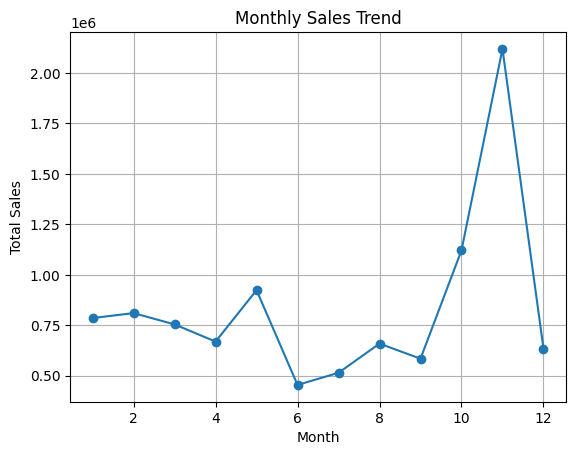

In [8]:
monthly_sales = df.groupby('MONTH_ID')['SALES'].sum()

plt.figure()
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

### Year-wise Sales Analysis :

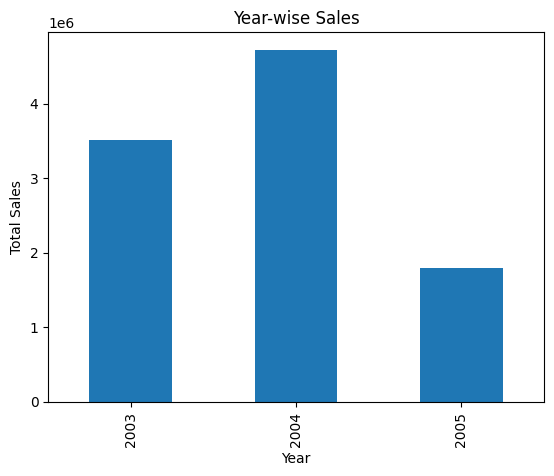

In [9]:
yearly_sales = df.groupby('YEAR_ID')['SALES'].sum()

plt.figure()
yearly_sales.plot(kind='bar')
plt.title("Year-wise Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

### Product Line Analysis :

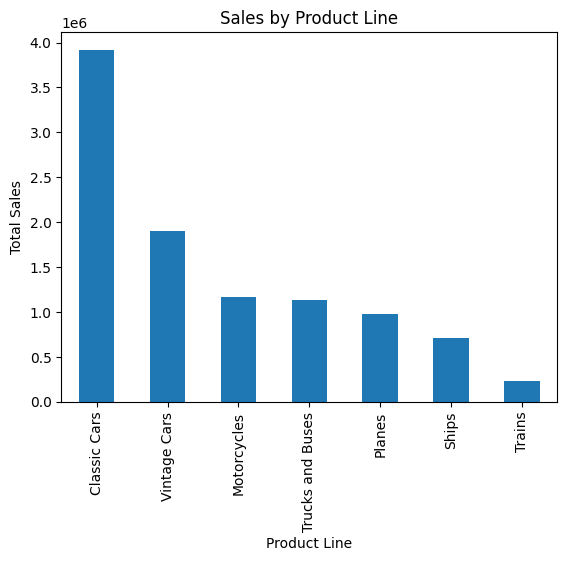

In [10]:
product_sales = (
    df.groupby('PRODUCTLINE')['SALES']
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
product_sales.plot(kind='bar')
plt.title("Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.show()

### Order Status Distribution :

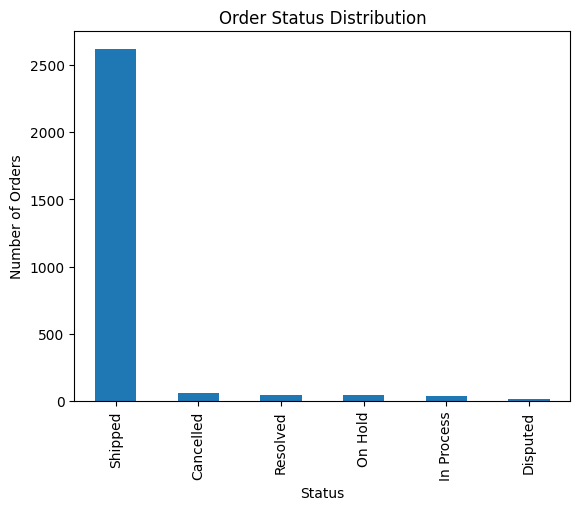

In [11]:
status_counts = df['STATUS'].value_counts()

plt.figure()
status_counts.plot(kind='bar')
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Orders")
plt.show()

### Top 10 Customers :

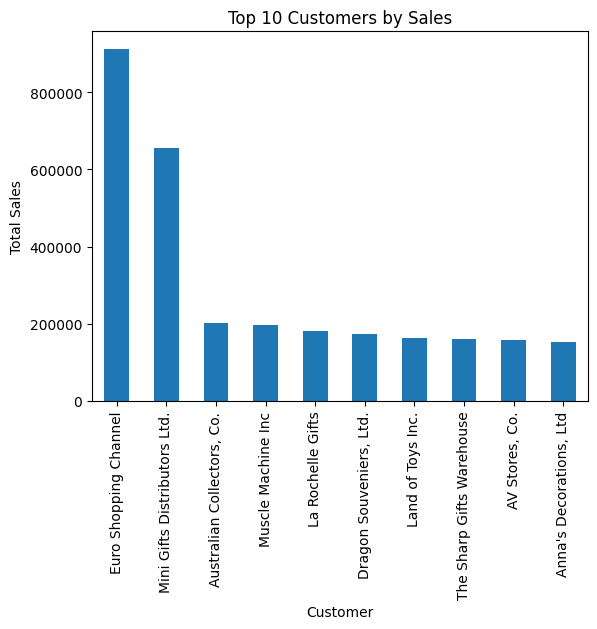

In [12]:
top_customers = (
    df.groupby('CUSTOMERNAME')['SALES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer")
plt.ylabel("Total Sales")
plt.show()

## Key Insights
- Sales show seasonal patterns across months
- Certain product lines dominate revenue
- A small number of customers contribute most sales
- Most orders are successfully shipped
